<div id="toc"></div>

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Method: `bhp` slices

Develop a method for slicing `bhp` by $\Delta t_1$ or $\Delta t_2$.

* Load `bhp` (or `bhm` $\rightarrow$ `bhp`)
* Plot `bhp`
* Select by $\Delta t_1$ or $\Delta t_2$
* Plot that distribution
* Look at average energies

In [1]:
import numpy as np
import scipy.io as sio
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.colors
import inspect
import seaborn as sns
sns.set(style='ticks')

In [2]:
# Load the bicorr.py functions I have already developed
sys.path.append('../scripts')

import bicorr as bicorr
import bicorr_plot as bicorr_plot
import bicorr_math as bicorr_math

In [3]:
%load_ext autoreload
%autoreload 2

# Load `det_df`, channel lists

In [4]:
os.listdir('../meas_info/')

['detector_distances.xlsx',
 'detector_positions.xlsx',
 'det_df.csv',
 'det_df.pkl',
 'det_df_pairs_angles.csv',
 'det_df_pairs_angles.pkl',
 'lanl_detector_angles.mat',
 'lanl_detector_angles_note.md']

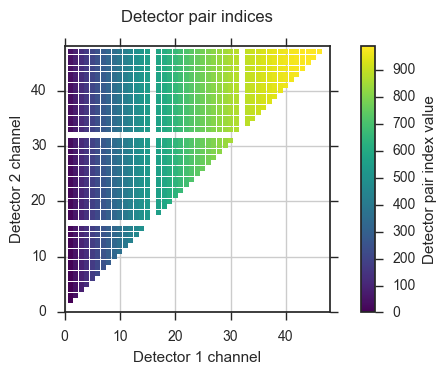

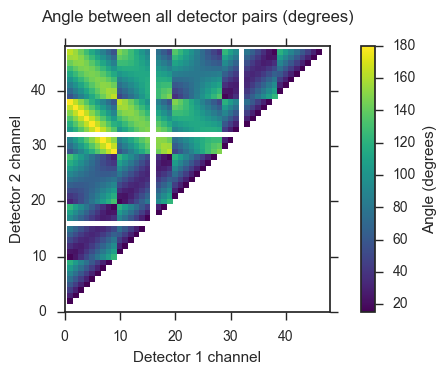

In [5]:
det_df = bicorr.load_det_df('../meas_info/det_df_pairs_angles.csv',plot_flag=True)

In [6]:
chList, fcList, detList, num_dets, num_det_pairs = bicorr.build_ch_lists(print_flag=True)

Fission chamber channels: [ 0 16 32]
Detector channels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Number of detectors: 45
Number of detector pairs: 990


# Load `bhp` data

Do I have a `bhp` distribution saved that I can load directly? I would rather not have to load and revive `bhm` because it requires so much memory.

Work with data from `Cf072115_to_Cf072215b` analysis.

In [9]:
os.listdir('../analysis/Cf072115_to_Cf072215b/')

['.ipynb_checkpoints',
 'analysis.pptx',
 'analysis_Asym_v_emin.ipynb',
 'analysis_bicorr_plots_gifs.html',
 'analysis_bicorr_plots_gifs.ipynb',
 'analysis_build_bhp_nn_by_pair_1_ns.html',
 'analysis_build_bhp_nn_by_pair_1_ns.ipynb',
 'analysis_counts_v_angle.ipynb',
 'analysis_experimental_setup_figs.html',
 'analysis_experimental_setup_figs.ipynb',
 'analysis_latex',
 'analysis_singles_counts.ipynb',
 'analysis_singles_sum.html',
 'analysis_singles_sum.ipynb',
 'analysis_slices_by_t.ipynb',
 'bhp_nn_gif.npz',
 'datap',
 'fig',
 'flux_run_notes.pptx']

In [7]:
bhp_nn_gif_data = np.load('../analysis/Cf072115_to_Cf072215b/bhp_nn_gif.npz')
print(bhp_nn_gif_data.files)

['bhp_nn_neg_mean', 'th_bin_edges', 'dt_bin_edges_neg', 'vmax_nn_rel', 'norm_factor', 'vmin_nn', 'dt_bin_edges', 'bhp_nn_pos_mean', 'num_fissions', 'bhp_nn_pos_rel', 'bhp_nn_diff_rel', 'bhp_nn_pos', 'bhp_nn_diff', 'vmax_nn', 'bhp_nn_diff_mean', 'bhp_nn_neg', 'vmin_nn_rel', 'bhp_nn_neg_rel']


In [8]:
norm_factor = bhp_nn_gif_data['norm_factor']
bhp_nn_pos  = bhp_nn_gif_data['bhp_nn_pos']
bhp_nn_neg  = bhp_nn_gif_data['bhp_nn_neg']
bhp_nn_diff = bhp_nn_gif_data['bhp_nn_diff']
th_bin_edges= bhp_nn_gif_data['th_bin_edges']
th_bin_centers = (th_bin_edges[:-1]+th_bin_edges[1:])/2
dt_bin_edges= bhp_nn_gif_data['dt_bin_edges']
dt_bin_edges_neg= bhp_nn_gif_data['dt_bin_edges_neg']

In [9]:
bhp_nn_diff.shape

(9, 800, 800)

Sum along first axis to make distribution across all angles. Multiply by norm_factor so we're working with counts (instead of normalized).

In [20]:
bhp = np.sum(bhp_nn_diff,axis=0)
for i in range(len(norm_factor)):
    bhp_nn_diff[i,:,:] = norm_factor[i] * bhp_nn_diff[i,:,:]

bhp.shape

(800, 800)

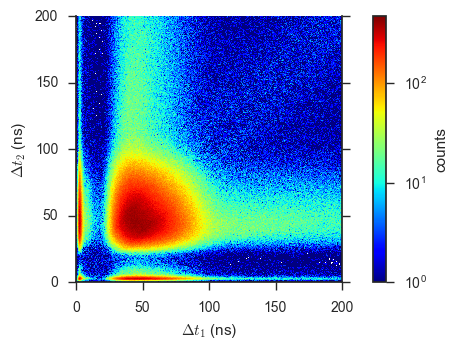

In [22]:
bicorr.bhp_plot(bhp,dt_bin_edges,show_flag = True, vmin=1)

Coarsen time binning.

In [23]:
bhp, dt_bin_edges = bicorr.coarsen_bhp(bhp, dt_bin_edges, 8, normalized = True, print_flag = True)

Dimensions of bicorr_hist_plot:  (800, 800)
Width of time bin in (ns):  0.25
Width of coarse time bin in (ns):  2.0
Condensing bhp from shape  (800, 800)  to  (100, 100)


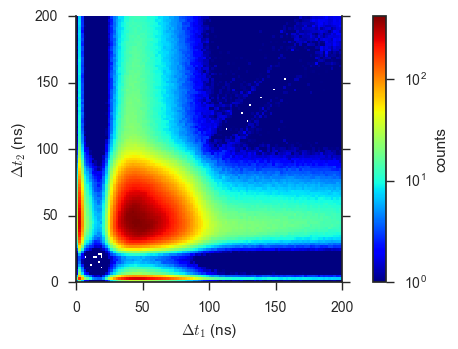

In [25]:
bicorr.bhp_plot(bhp,dt_bin_edges,show_flag = True, vmin=1)

# Sum along a specific slice for $\Delta t_1$

In [26]:
dt_bin_centers = (dt_bin_edges[:-1]+dt_bin_edges[1:])/2

In [27]:
i = 25
print(dt_bin_edges[i])
print(dt_bin_edges[i+1])
print(dt_bin_centers[i])

50.0
52.0
51.0


In [28]:
t = 51
i = np.digitize(t,dt_bin_edges)-1

In [29]:
print(dt_bin_edges[i])
print(dt_bin_edges[i+1])
print(dt_bin_centers[i])

50.0
52.0
51.0


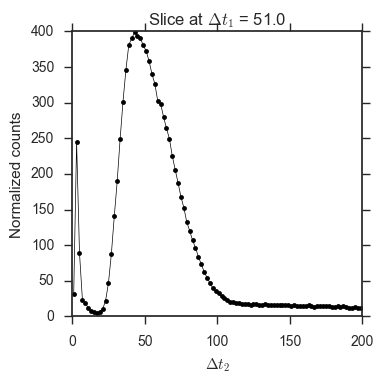

In [30]:
plt.figure(figsize=(4,4))
plt.plot(dt_bin_centers,bhp[i,:],'.-k',linewidth=.5)
plt.xlabel('$\Delta t_2$')
plt.ylabel('Normalized counts')
plt.title('Slice at $\Delta t_1$ = {}'.format(dt_bin_centers[i]))
plt.tight_layout()
plt.show()

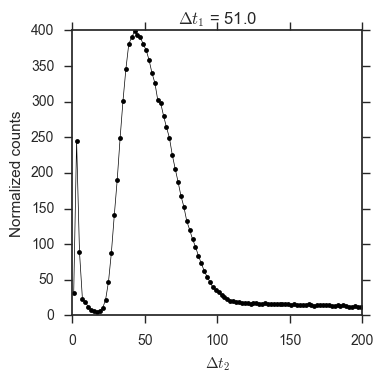

In [31]:
plt.figure(figsize=(4,4))
plt.plot(dt_bin_centers,bhp[i,:],'.-k',linewidth=.5)
plt.xlabel('$\Delta t_2$')
plt.ylabel('Normalized counts')
plt.title('$\Delta t_1$ = {}'.format(dt_bin_centers[i]))
plt.tight_layout()
plt.show()

This works, but I need to work with the full dataset and coarsen the timing.

# Take both slices

The way I am plotting the distribution above, I am holding $\Delta t_1$ constant and looking at $\Delta t_2$. This means that I am looking at the distribution of detctor 2 with detector 1 held constant.

This introduces some bias, or more precisely, removes a biased set of channels from the distribution. 

Since detctor pairs are organizes such that `det1ch < det2ch`, I am looking at the distribution of neutron times for the higher detector channels. 

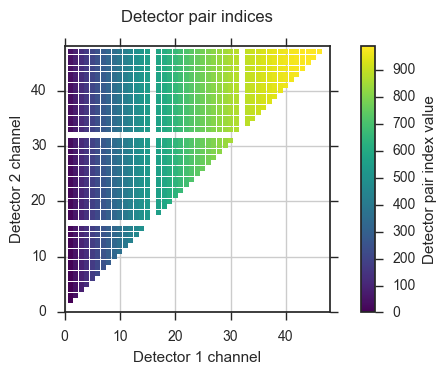

In [32]:
bicorr.plot_det_df(det_df, which='index')

In order to include all data, I need to take the sum of all detectors pairs in *both* directions. Try it out.

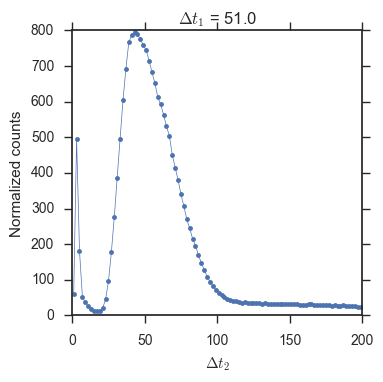

In [33]:
plt.figure(figsize=(4,4))
plt.plot(dt_bin_centers,bhp[i,:]+bhp[:,i],'.-',linewidth=.5)
plt.xlabel('$\Delta t_2$')
plt.ylabel('Normalized counts')
plt.title('$\Delta t_1$ = {}'.format(dt_bin_centers[i]))
plt.tight_layout()
plt.show()

# Normalize it

In order to compare multiple traces, I need to normalize them either by the peak or the total number. For now I am going to go with the total number. 

Create slices at a few times.

In [34]:
t_slices = [30,50,70,90]

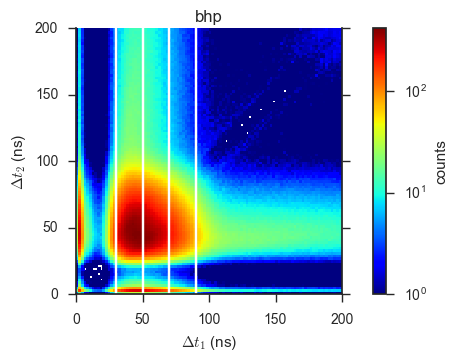

In [38]:
bicorr.bhp_plot(bhp,dt_bin_edges,title='bhp',clear=False,vmin=1)
for t in t_slices:
    plt.axvline(t,c='w')
plt.show()

In [39]:
bhp_slices = np.zeros((len(t_slices),len(dt_bin_centers)))

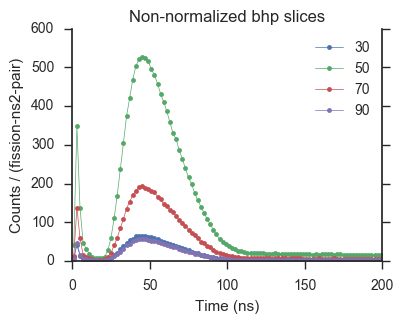

In [40]:
plt.figure(figsize=(4,3))
for t in t_slices:
    i = t_slices.index(t) # Works as long as t_slices is unique
    
    bhp_slices[i,:] = bhp[i,:]+bhp[:,i]
    plt.plot(dt_bin_centers,bhp_slices[i,:],'.-',linewidth=.5)
plt.xlabel('Time (ns)')
plt.ylabel('Counts / (fission-ns2-pair)')
plt.legend([str(t) for t in t_slices])
plt.title('Non-normalized bhp slices')
sns.despine(right=False)
plt.show()

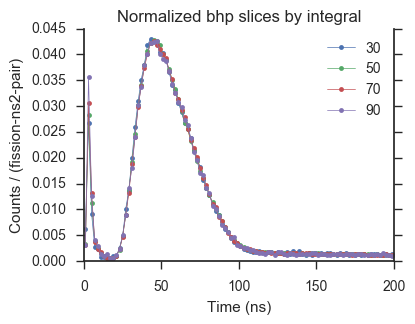

In [41]:
plt.figure(figsize=(4,3))
for t in t_slices:
    i = t_slices.index(t) # Works as long as t_slices is unique
    
    bhp_slices[i,:] = bhp[i,:]+bhp[:,i]
    plt.plot(dt_bin_centers,bhp_slices[i,:]/np.sum(bhp_slices[i,:]),'.-',linewidth=.5)
plt.xlabel('Time (ns)')
plt.ylabel('Counts / (fission-ns2-pair)')
plt.legend([str(t) for t in t_slices])
plt.title('Normalized bhp slices by integral')
sns.despine(right=False)
plt.show()

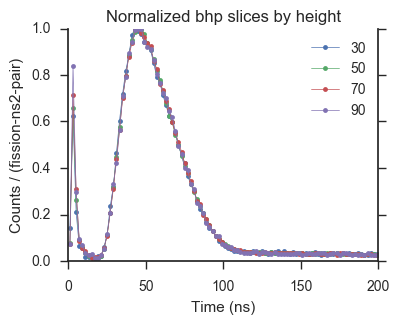

In [42]:
plt.figure(figsize=(4,3))
for t in t_slices:
    i = t_slices.index(t) # Works as long as t_slices is unique
    
    bhp_slices[i,:] = bhp[i,:]+bhp[:,i]
    plt.plot(dt_bin_centers,bhp_slices[i,:]/np.max(bhp_slices[i,:]),'.-',linewidth=.5)
plt.xlabel('Time (ns)')
plt.ylabel('Counts / (fission-ns2-pair)')
plt.legend([str(t) for t in t_slices])
plt.title('Normalized bhp slices by height')
sns.despine(right=False)
plt.show()

# Functionalize it

I want to automate the process for producing this based on a give time stamp. 

## Functionalize calculating the slice

In [43]:
help(bicorr.slice_bhp)

Help on function slice_bhp in module bicorr:

slice_bhp(bhp, dt_bin_edges, delta_tj_min, delta_tj_max=None, print_flag=False)
    Produce counts vs. \Delta t_i at constant \Delta t_j from bhp
    
    Parameters
    ----------
    bhp : ndarray
        Array to plot. Two-dimensional with axes sizes corresponding to dt_bin_edges x dt_bin_edges.
    dt_bin_edges : ndarray
        One-dimensional array of time bin edges
    delta_tj_min : float
        Time at which to slice bhp- lower boundary
    delta_tj_max : float
        Time at which to slice bhp- upper boundary. If not provided, only use one bin in which delta_tj_min exists
    print_flag : bool
        Option to print status updates
        
    Returns
    -------
    bhp_slice : ndarray
        Slice through bhp at delta_tj_min
    slice_dt_range : list
        Two-element list
        Lower and upper bound of slice time window
        slice_dt_range[0] = lower time bound, slice_dt_range[1] = upper time bound



In [44]:
bhp_slice, slice_dt_range = bicorr.slice_bhp(bhp,dt_bin_edges,50.0,53.0,True)

Creating slice through bhp for times from 50.0 to 54.0


## Functionalize creating bhp_slices

Need to create a bunch of slices at once from t_slices. For now just do t_slices, don't specify max time range for each slice. 

In [45]:
t_slices
print(t_slices)

[30, 50, 70, 90]


In [46]:
bhp_slices, slice_dt_ranges = bicorr.slices_bhp(bhp,dt_bin_edges,t_slices)

## Functionalize plotting

In [47]:
help(bicorr.plot_bhp_slice)

Help on function plot_bhp_slice in module bicorr_plot:

plot_bhp_slice(bhp_slice, dt_bin_edges, slice_dt_range=None, normalized=None, title=True, show_flag=False, save_flag=False, save_filename='bhp_slice', save_folder='fig', new_fig=True, clear=True, msize=5, t_norm_range=None)
    Plot bhp slice.
    
    Parameters
    ----------
    bhp_slice : ndarray
        Slice through bhp at delta_tj_min, produce with slice_bhp()
    dt_bin_edges : ndarray
        One-dimensional array of time bin edges
    slice_dt_range : array or float, optional
        Range of dt values over which slice was taken. Primarily used for creating a title or legend
        if None: not provided
        if array: Min and max of slice range, ex: [slice_dt_min, slice_dt_max]
        if float: Slice position, ex: slice_dt_middle
    normalized : str, optional
        None: Don't normalize
        'int': Normalize by integral
        'max': Normalize by height
    title : str, optional
        Title for plot. Ex: '

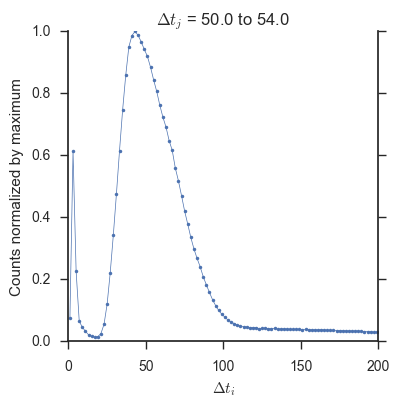

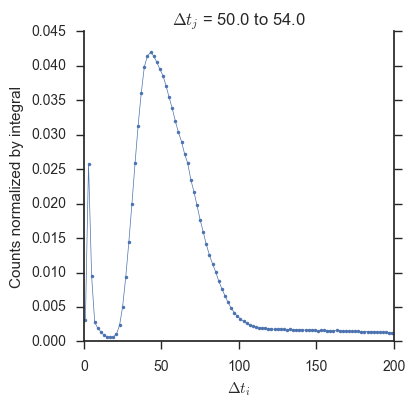

In [48]:
bicorr.plot_bhp_slice(bhp_slice, dt_bin_edges, slice_dt_range = slice_dt_range, show_flag = True, normalized='max')

bicorr.plot_bhp_slice(bhp_slice, dt_bin_edges, slice_dt_range = slice_dt_range, show_flag = True, normalized='int')

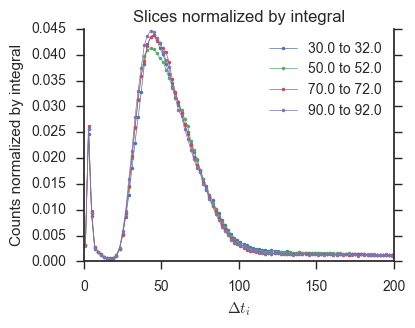

In [49]:
plt.figure(figsize=(4,3))
legend_text = []

for t in t_slices:
    i = t_slices.index(t) # Works as long as t_slices is unique
    bicorr.plot_bhp_slice(bhp_slices[i,:],dt_bin_edges,slice_dt_ranges[i,:],normalized='int',clear=False,new_fig=False)
    legend_text.append('{} to {}'.format(slice_dt_ranges[i,0],slice_dt_ranges[i,1]))

plt.legend(legend_text)
plt.title('Slices normalized by integral')
plt.show()

In [50]:
help(bicorr_plot.plot_bhp_slices)

Help on function plot_bhp_slices in module bicorr_plot:

plot_bhp_slices(bhp_slices, dt_bin_edges, t_slices, slice_dt_ranges)
    Plot bhp_slices on same axes, normalized by integral
    
    Parameters
    ----------
    bhp_slices : ndarray
        Array of bhp slices. Dimensions: len(t_slices) x len(dt_bin_centers)    
    dt_bin_edges : ndarray
        One-dimensional array of time bin edges
    slice_dt_ranges : ndarray
        Array of slice_dt_ranges. Dimensions: len(t_slices) x 2 (min, max)
    
    Returns
    -------
    n/a



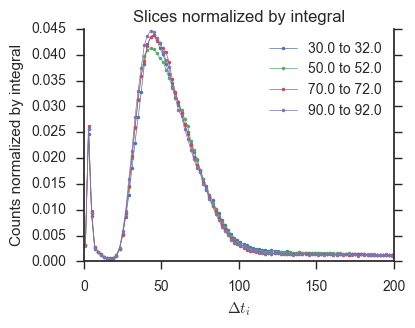

In [51]:
bicorr_plot.plot_bhp_slices(bhp_slices,dt_bin_edges,t_slices,slice_dt_ranges)

# Convert to energy space

## Time to energy

In [52]:
energy_bin_edges = np.asarray(np.insert([bicorr.convert_time_to_energy(t) for t in dt_bin_edges[1:]],0,10000))

How do time and energy relate?

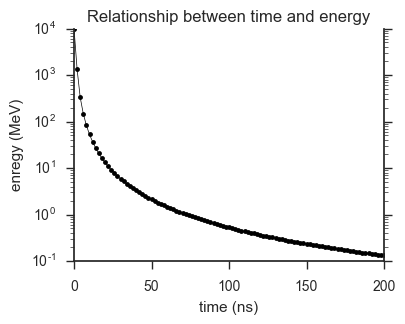

In [53]:
plt.figure(figsize=(4,3))
plt.plot(dt_bin_edges,energy_bin_edges,'.-k',linewidth=.5)
plt.yscale('log')
plt.xlabel('time (ns)')
plt.ylabel('enregy (MeV)')
sns.despine(right=False)
plt.title('Relationship between time and energy')
plt.show()

## Convert the slice into energy space

In [54]:
t_slices

[30, 50, 70, 90]

For each slice, the `bhp_slice` array stays the same, but the x-axis changes from `dt_bin_edges` to `energy_bin_edges`, which is inverted. 

It would be interesting to show the time distributions with two x-axes, one in time and one in energy. 

Creating slice through bhp for times from 30.0 to 32.0
Creating slice through bhp for times from 50.0 to 52.0
Creating slice through bhp for times from 70.0 to 72.0
Creating slice through bhp for times from 90.0 to 92.0
['5.13 to 5.84 MeV', '1.94 to 2.10 MeV', '1.01 to 1.07 MeV', '0.62 to 0.65 MeV']


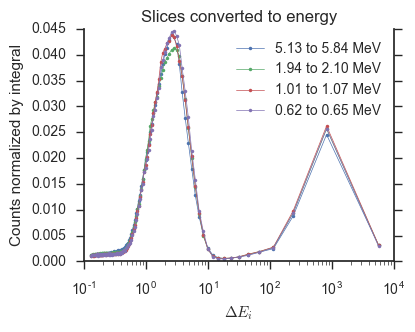

In [55]:
plt.figure(figsize=(4,3))

legend_text = []

for t in t_slices:
    i = t_slices.index(t) # Works as long as t_slices is unique
    
    bhp_slice, slice_dt_range = bicorr.slice_bhp(bhp,dt_bin_edges,t,print_flag=True)
    bicorr.plot_bhp_slice(bhp_slice, energy_bin_edges, slice_dt_range, normalized='int', clear=False, new_fig=False)
    legend_text.append('{:04.2f} to {:04.2f} MeV'.format(bicorr.convert_time_to_energy(slice_dt_range[1]),bicorr.convert_time_to_energy(slice_dt_range[0])))
    plt.xscale('log')
    plt.xlabel('$\Delta E_i$')
print(legend_text)

plt.legend(legend_text)
plt.title('Slices converted to energy')
plt.show()

# Calculate mean energy

## Over entire range of values

In [56]:
Eave = np.zeros((len(t_slices)))
Eave_err = np.zeros((len(t_slices)))
Ej = np.zeros((len(t_slices)))

In [57]:
for i in range(len(t_slices)):
    t = t_slices[i]
    Eave[i], Eave_err[i] = bicorr_math.calc_histogram_mean(energy_bin_edges, bhp_slices[i,:])
    Ej[i] = bicorr.convert_time_to_energy(t)

In [58]:
print(Eave, Eave_err)

[ 42.51483749  43.89413358  44.70838701  42.76189763] [ 3.5143613   2.51067066  3.49747615  6.02335695]


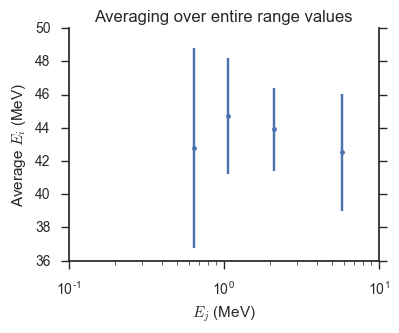

In [59]:
plt.figure(figsize=(4,3))
plt.errorbar(Ej,Eave,yerr=Eave_err,fmt='.')
plt.xlabel('$E_j$ (MeV)')
plt.ylabel('Average $E_i$ (MeV)')
plt.xscale('log')
plt.title('Averaging over entire range values')
sns.despine(right=False)
plt.show()

## Vary limits

In [68]:
energy_bin_centers = bicorr.calc_centers(energy_bin_edges)

In [60]:
Ei_min = 0.23
Ei_max = 23

Remember that energy_bin_edges is decreasing. Do I want to have inclusive or exclusive boundaries?

Reading `np.digitize` [documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.digitize.html):
* If `bins` is monotonically increasing (as was in `dt_bin_edges`).... `bins[i-1] <= x < bins[i]`
* If `bins` is monotonically decreasing (like in our case).... `bins[i-1] > x >= bins[i]`

Earlier, I sort of hacked this in digitizing `dt_bin_edges`. Instead of saying

`i = np.digitize(t)`,

I used 

`i = np.digitize(t)-1`

so that I could then use the `i`th index of `centers` and it would line up. See how it works here.

Because `energy_bin_edges` is monotonically *decreasing*, I will need to adjust a bit.

In [101]:
i_min = int(np.digitize(Ei_min,energy_bin_edges))-1
i_max = int(np.digitize(Ei_max,energy_bin_edges))-1
print(i_min)
print(i_max)

75
7


In [104]:
print(energy_bin_edges[i_min+1])
print(energy_bin_edges[i_min])
print(energy_bin_centers[i_min])

print(energy_bin_edges[i_max+1])
print(energy_bin_edges[i_max])
print(energy_bin_centers[i_max])

0.227440228069
0.233545734636
0.230492981353
20.5264805833
26.8100970884
23.6682888358


That looks good. Just remember that since this is monotonically decreasing, `i_max < i_min`. That may confuse me later...

Now implement these limits in a sum. 

## Aside: Handle monotonically decreasing indexing
First I need to figure out how to handle the indexing.

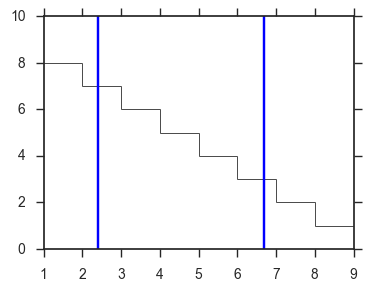

In [139]:
x_edges = np.array([9,8,7,6,5,4,3,2,1])
x_centers = bicorr.calc_centers(x_edges)
y = np.array([1,2,3,4,5,6,7,8])

x_min = 2.4
x_max = 6.7

plt.figure(figsize=(4,3))
bicorr.step_plot(x_edges,y)
plt.axvline(x_min)
plt.axvline(x_max)
plt.ylim([0,10])
plt.show()

In [140]:
x_min = 2.4
x_max = 6.7

i_min = int(np.digitize(x_min,x))-1
i_max = int(np.digitize(x_max,x))-1
print(i_min)
print(i_max)

6
2


In [141]:
print(x_edges[i_min+1])
print(x_edges[i_min])
print(x_centers[i_min])

print(x_edges[i_max+1])
print(x_edges[i_max])
print(x_centers[i_max])

2
3
2.5
6
7
6.5


In [142]:
np.sum(y[i_max:i_min])

18

I believe this is excluding the 2-3 bin. I want to include that bin, so be *inclusive* in this sum (expand to outer boundaries).

In [143]:
np.sum(y[i_max:i_min+1])

25

In [144]:
7+6+5+4+3

25

That looks right now. What about the edges? Need to go from 2-7.

In [146]:
x_edges[i_max:i_min+2]

array([7, 6, 5, 4, 3, 2])

Now implement with the energy variables. 

## Back to varying limits

In [155]:
energy_bin_centers = bicorr.calc_centers(energy_bin_edges)

In [156]:
Ei_min = 0.23
Ei_max = 18

In [157]:
i_min = int(np.digitize(Ei_min,energy_bin_edges))-1
i_max = int(np.digitize(Ei_max,energy_bin_edges))-1
print(i_min)
print(i_max)

75
8


In [158]:
print(energy_bin_edges[i_min+1])
print(energy_bin_edges[i_min])
print(energy_bin_centers[i_min])

print(energy_bin_edges[i_max+1])
print(energy_bin_edges[i_max])
print(energy_bin_centers[i_max])

0.227440228069
0.233545734636
0.230492981353
16.2184537942
20.5264805833
18.3724671887


Write it into a loop.

In [159]:
Eave = np.zeros((len(t_slices)))
Eave_err = np.zeros((len(t_slices)))
Ej = np.zeros((len(t_slices)))

In [161]:
for i in range(len(t_slices)):
    t = t_slices[i]
    Eave[i], Eave_err[i] = bicorr_math.calc_histogram_mean(energy_bin_edges[i_max:i_min+2], bhp_slices[i,i_max:i_min+1])
    Ej[i] = bicorr.convert_time_to_energy(t)

In [162]:
print(Eave)
print(Eave_err)
print(Ej)

[ 2.21400542  2.26097394  2.29298881  2.33617561]
[ 0.03751502  0.02714087  0.03781208  0.06851522]
[ 5.83864337  2.10191161  1.07240388  0.64873815]


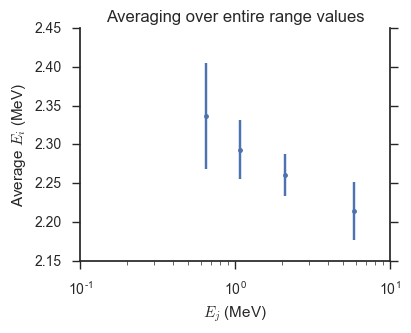

In [163]:
plt.figure(figsize=(4,3))
plt.errorbar(Ej,Eave,yerr=Eave_err,fmt='.')
plt.xlabel('$E_j$ (MeV)')
plt.ylabel('Average $E_i$ (MeV)')
plt.xscale('log')
plt.title('Averaging over entire range values')
sns.despine(right=False)
plt.show()

Last step is to functionalize this, which I will do later. 